+ This notebook is part of the addition lecture *An overview of key ideas* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Specialist Surgeon
    + Groote Schuur Hospital
    + Senior Lecturer in Surgery and Biostatistics & Machine Learning
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

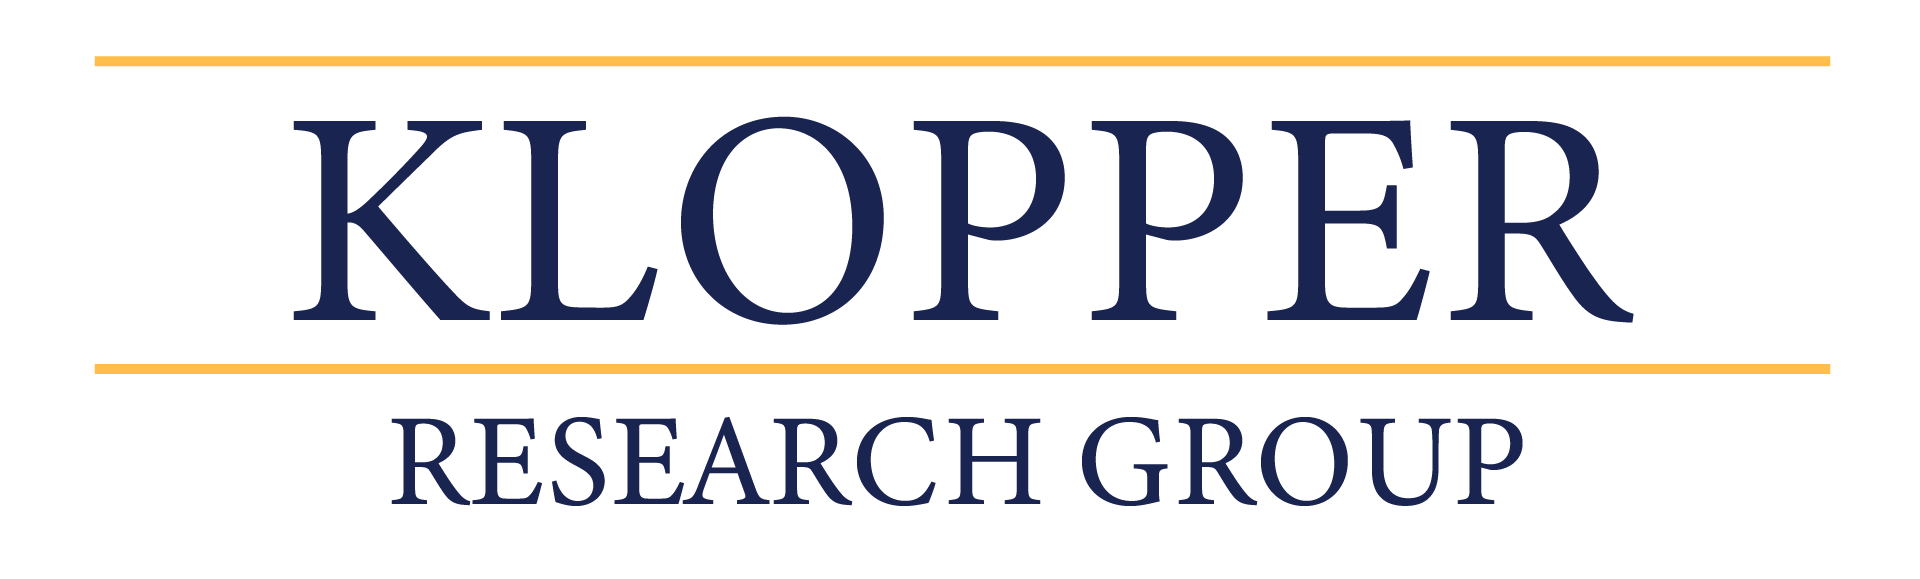

In [3]:
from IPython.display import Image
Image('KRG_elegant_logo_for_light_BG.png')

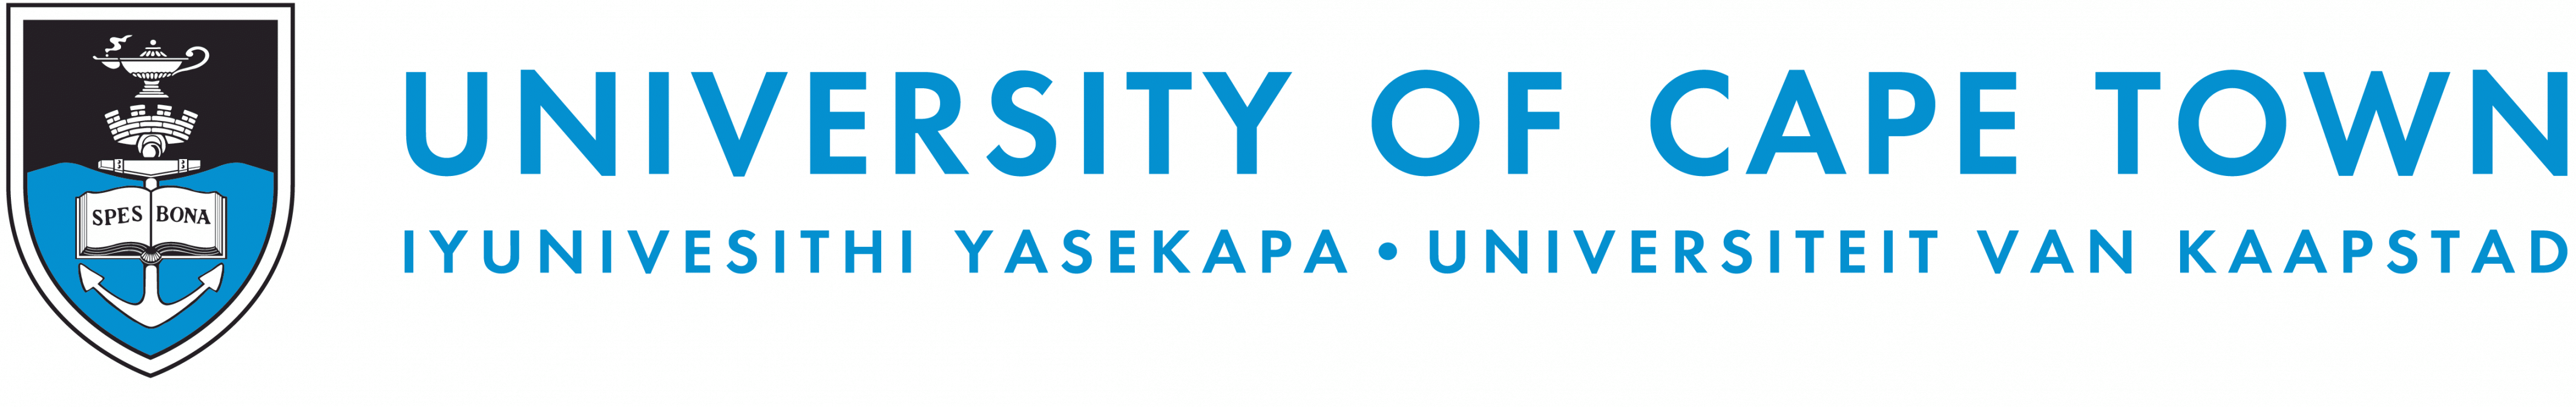

In [4]:
Image('UCT_logo.gif')

In [3]:
# Comments will be in this form
# Comments are not executed

# Geometrical view

## Preamble

## System of linear equations

Most courses and textbooks introduce linear algebra to solve systems of linear equations.  _Linear equations_ have independent variables that are each of power one and not transcendental.  Example are shown in (1) below.

$$ \begin{align} {2x}-{y}&={3} \\ -{x} + 2{y} &= {0} \end{align} \tag{1} $$

Solving systems of linear equations attempts at finding numerical solutions for the variables taht solve all the equations in the linear system.  A solution to (1) is shown in (2) below.

$$\begin{align}2 &\left( 2 \right) - 1 \left( 1 \right) = 3 \\ - &\left( 2 \right) + 2 \left( 1 \right) = 0\end{align}\tag{2}$$

We can create an _augmented matrix_ from the system in (1).  To do this, we create a matrix of coefficients, including those from both sides of the equations.  We store the matrix as a computer variable called `A_augm`.

In [6]:
A_augm = Matrix([[2, -1, 0], [-1, 2, 3]]) # Note the placement of ()'s and []'s
A_augm # A_augm is a computer variable that contains the matrix

⎡2   -1  0⎤
⎢         ⎥
⎣-1  2   3⎦

Because `A_augm` was created using the `Matrix()` function from `sympy`, it is an instance of this type.  The `type()` indicates it more specificically as a _mutable, dense matrix_.  Mutable means that we can change the values of the elements (coefficients in this case) and dense because the value of each position in the matrix is stored.  (when there are many zeros, the a sparse matrix can be created, that only stores the values that are not zero and their positions.)

In [7]:
# We can ask python what type of computer variable A_augm holds
type(A_augm)  # We see that it is a mutable dense matrix

sympy.matrices.dense.MutableDenseMatrix

We can also create a _matrix of coefficients_.  It includes only ethe left-hand side coefficients.

In [8]:
A = Matrix([[2, -1], [-1, 2]])  # Matrix of coefficients
A

⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦

The variables (unknowns) can be expressed as a column vector, saved as the computer variable `x_vect` below.  First, we specify the variable `x` and `y` as mathematical variables using the `symbols()` function.

In [9]:
x, y, z = symbols('x y z') # Creating symbolic mathematical variables as opposed to computer variables
# These symbols can no longer be used as computer variable names

In [10]:
x_vect = Matrix([x, y])
x_vect

⎡x⎤
⎢ ⎥
⎣y⎦

The same goes for the column vector of solutions, saved as the computer variable `b_vect`.

In [17]:
b_vect = Matrix([0, 3])
b_vect

⎡0⎤
⎢ ⎥
⎣3⎦

In (3) below we see the matrix times the column vector results in the vector of solutions.  The (row, column) sizes are also shown.

$$ \begin{align} A_{2 \times 2} \quad \underline{x}_{2 \times 1} = \underline{b}_{2 \times 1} \\ \\ \begin{bmatrix} 2 && -1 \\ -1 && 2 \end{bmatrix} \begin{bmatrix} x \\ y\end{bmatrix} = \begin{bmatrix} 0 \\ 3 \end{bmatrix} \end{align} \tag{3}$$

The `Eq()` function is used below to do the matrix times the vector on the left-hand side (resulting in a column vector) and the solution vector on the right.  It gives a visual idea of how we use linear algebra to solve these systems.

In [10]:
Eq(A * x_vect, b_vect) # From Ax = b
# The Eq function takes the arguments left-hand-side (LHS), right-handside (RHS) of the equation

⎡2⋅x - y ⎤ = ⎡0⎤
⎢        ⎥   ⎢ ⎥
⎣-x + 2⋅y⎦   ⎣3⎦

## The row picture

Each linear equation above is an equation of a straight line.  This represents the _row picture_ of a linear system.  The solutions to both equations is at the point where they cross.  Have a look at the plot below. Don't be too concerned about the code for plotting.  It does not form part of this series of notebooks.

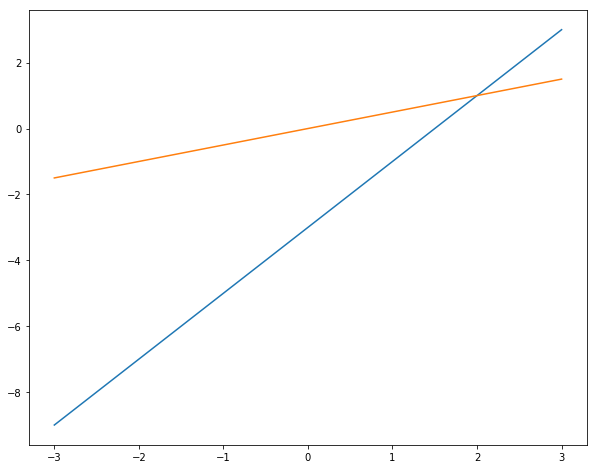

In [13]:
x_vals = np.linspace(-3, 3, 100) # Create 100 values between -3 and 3
# Note that we cannot use the computer variable x, because it has been reserved above as a mathematical variable in
# the symbols function

plt.figure(figsize = (10,8)) # Create a graph of size 10 by 8
plt.plot(x_vals, 2 * x_vals - 3) # Plot every single value created above with 2 times that values
# Taken from the first equation which was y = 2x or f(x) = 2x
# The plot takes the arguments (code between parentheses) of x,y
plt.plot(x_vals, ((x_vals / 2))) # Also plot the second equation
plt.show; # Draw the plot on screen

We note that the two line cross at the point $\left( 2, 1 \right)$.  It should be clear that there are three possible outcomes for a system with two variables and two equations.  Either the lines cross with a single solution, or they do not cross at all (parallel lines), with no solutions, or they coincide, with infinitely many solutions.

## The column picture

We can view the same system as a vector problem.  Here the coefficients of each separate variable as a colum vector.  This probem now becomes a linear combination of vectors.  We are thus asking how many (scalar multiplication) of one vector plus how many of teh other vector will equal the vector on the right hand side.  This should be clear from (4) below.

$$ x\begin{bmatrix} 2 \\ -1 \end{bmatrix}+y\begin{bmatrix} -1 \\ 2 \end{bmatrix}=\begin{bmatrix} 0 \\ 3 \end{bmatrix} \tag{4}$$

As before, we create separate computer variables and show that the end-result is the same.

In [15]:
x_var_vect = Matrix([2, -1])
x_var_vect

⎡2 ⎤
⎢  ⎥
⎣-1⎦

In [16]:
y_var_vect = Matrix([-1, 2])
y_var_vect

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [18]:
Eq(x * x_var_vect + y * y_var_vect, b_vect)

⎡2⋅x - y ⎤   ⎡0⎤
⎢        ⎥ = ⎢ ⎥
⎣-x + 2⋅y⎦   ⎣3⎦

In the $3D$ plot below, we see the two vectors.

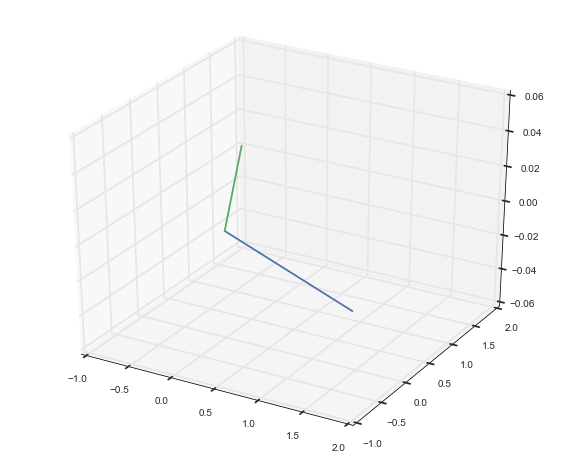

In [13]:
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, 2], [0, -1],zs=[0, 0])
# The three sets of square bracket contain as first element the starting
# point, i.e. 0, 0, 0 (as in  x, y ,z coordinates)
# The second element in each square bracket represents the end-point, i.e. 2, -1, 0 
ax.plot([0, -1], [0, 2],zs=[0, 0])

plt.show();

It should be very clear that the two vectors are special in that linear combinations of them will allow us to fill a plane in $\mathbb{R}^{3}$ (in which they both lie).

It should also be clear to see that these two vectors are not linear combinations of each other.  If this were so, they are linearly independent and linear combinations of them fill only a line in $\mathbb{R}^{3}$. 

We can imagine that the $xy$-plane is filled with (all the points are created by) vectors, i.e. I can find any coordinate by drawing a vector to it.  All these vectors together can be called a _set_ and they fill $\mathbb{R}^{2}$.  Later we will learn about _basis vectors_ and how they _span_ a space.

## The 3-space picture

To end this section, we take a look athe three equation with three variables.

$$ \begin{align} {3x}+{2y}-{z}&=2 \\ {x}-{2y}-{z}&=3 \\ {2x}+{y}-{z}&={1} \end{align} \tag{5}$$

We can create an augmented matrix from the coefficents, stored in the computer variable `A_augm` below.

In [19]:
A_augm = Matrix([[3, 2, -1, 2], [1, -2, -1, 3], [2, 1, -1, 1]])
A_augm

⎡3  2   -1  2⎤
⎢            ⎥
⎢1  -2  -1  3⎥
⎢            ⎥
⎣2  1   -1  1⎦

The `.rref()` method will quickly solve the linear system for use.

In [20]:
A_augm.rref()

⎛⎡1  0  0  5/2 ⎤           ⎞
⎜⎢             ⎥           ⎟
⎜⎢0  1  0  -3/2⎥, (0, 1, 2)⎟
⎜⎢             ⎥           ⎟
⎝⎣0  0  1  5/2 ⎦           ⎠

The solution is where three planes in $\mathbb{R}^{3}$ _cross_.  We can once again imagine that the planes (each equation) may never cross or lie on-top of each other.  Below is an image of three planes crossing at one point.

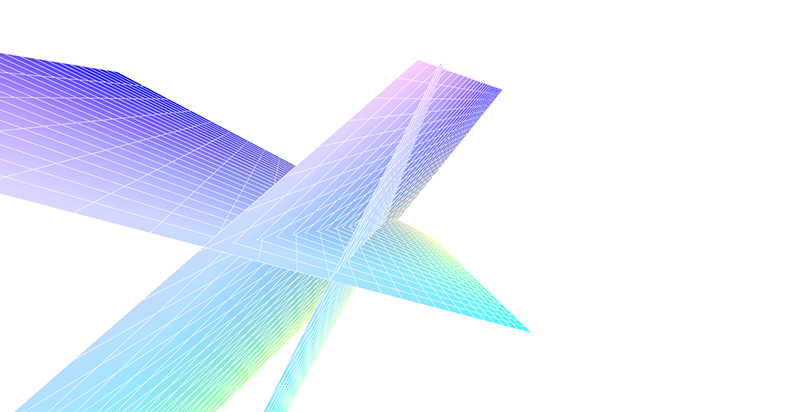

In [17]:
Image(filename = '3d.png')

As before, we can view this problem as a column picture.

## Conclusion

We have seen how linear systems can be viewed as rows or columns and how they can be seen as matrices and vectors.